In [2]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [18]:
mercados_dir = "../../../data/external/temporal_todocker/arroyo_vivo/mercados_pulgas_tianguis_cuenca_32614.gpkg"
mercados_gdf = gpd.read_file(mercados_dir)
mercados_gdf = mercados_gdf.to_crs("EPSG:4326")

# Show
print(mercados_gdf.shape)
mercados_gdf.head(2)

(8, 3)


,Name,Date and time,geometry
0,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"Jueves vespertino, sábado matutino y vespertino",POINT (-100.29735 25.62301)
1,Calle Naranjo @ Calle Alcaldía,Martes y sabado vespertino,POINT (-100.29423 25.62960)


In [59]:
mercados_gdf

,Name,Date and time,geometry
0,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"Jueves vespertino, sábado matutino y vespertino",POINT (-100.29735 25.62301)
1,Calle Naranjo @ Calle Alcaldía,Martes y sabado vespertino,POINT (-100.29423 25.62960)
2,Calle Santos Cantú Salinas @ Calle Pípila,Miércoles vespertino,POINT (-100.30287 25.64027)
3,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"Jueves vespertino, sábado matutino y vespertino",POINT (-100.29723 25.62345)
4,Mercadito CBTIS Calle Alfombrilla @ Calle Vall...,Sábados matutino,POINT (-100.30553 25.63870)
5,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"Jueves vespertino, sábado matutino y vespertino",POINT (-100.29718 25.62379)
6,Calle Naranjo @ Calle Alcaldía,Martes y sabado vespertino,POINT (-100.29443 25.62833)
7,Mercadito my maps comercio,Sábados matutino,POINT (-100.30983 25.63954)


In [52]:
aoi_gdf.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

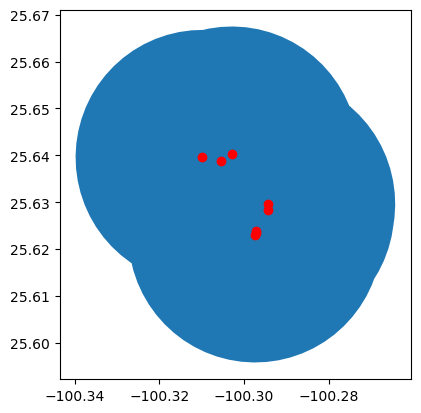

In [53]:
aoi_points = mercados_gdf.to_crs("EPSG:6372")
aoi_gdf = aoi_points.buffer(3000)
aoi_gdf = gpd.GeoDataFrame(aoi_gdf,geometry=0)
aoi_gdf.rename(columns={0:'geometry'},inplace=True)
aoi_gdf = aoi_gdf.set_geometry('geometry')
aoi_gdf = aoi_gdf.dissolve()
aoi_gdf = aoi_gdf.to_crs("EPSG:4326")

# Show plot
fig,ax = plt.subplots()
mercados_gdf.plot(ax=ax,zorder=1,color='red')
aoi_gdf.plot(ax=ax,zorder=0)

Created OSMnx graph from bounding polygon.
Converted OSMnx graph to 9192 nodes and 22127 edges GeoDataFrame.
Filtered columns.
Column: osmid in nodes gdf, has a list in it, the column data was converted to string.
Column: lanes in nodes gdf, has a list in it, the column data was converted to string.
Column: name in nodes gdf, has a list in it, the column data was converted to string.
Column: highway in nodes gdf, has a list in it, the column data was converted to string.
Column: maxspeed in nodes gdf, has a list in it, the column data was converted to string.


<Axes: >

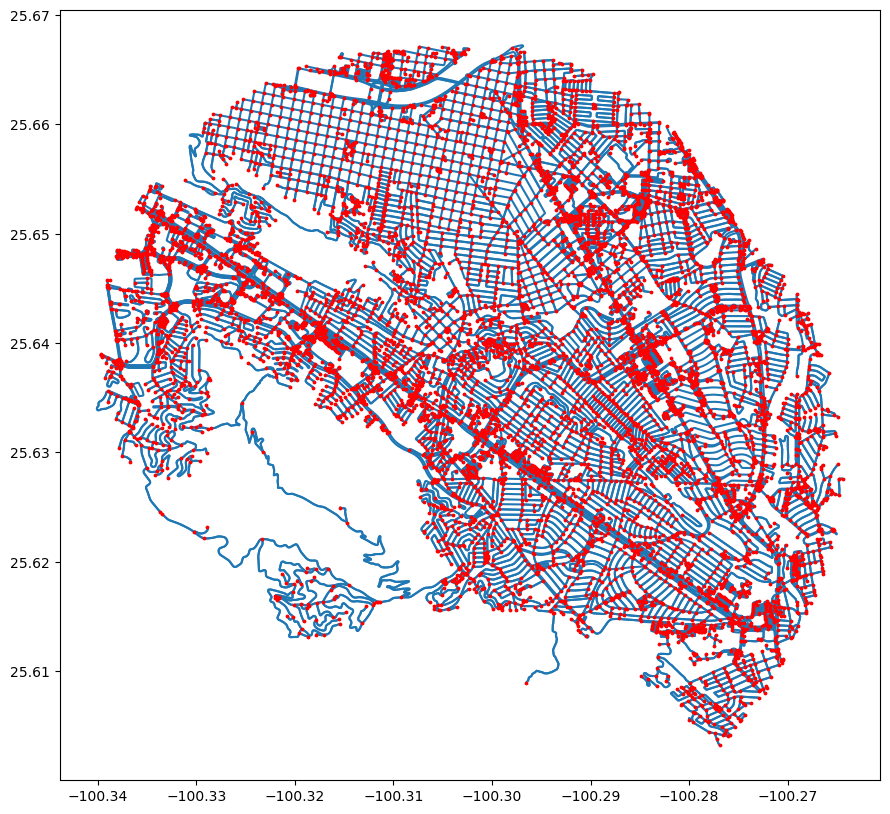

In [54]:
G, nodes, edges = aup.create_osmnx_network(aoi_gdf, how='from_polygon', network_type='all_private')

# Show plot
fig,ax = plt.subplots(figsize=(20,10))
nodes.plot(ax=ax,zorder=1,color='red',markersize=3)
edges.plot(ax=ax,zorder=0)

In [56]:
nearest = aup.find_nearest(G, nodes, mercados_gdf, return_distance= False)

# Show
nearest

,Name,Date and time,geometry,osmid
0,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"Jueves vespertino, sábado matutino y vespertino",POINT (-100.29735 25.62301),1681033646
1,Calle Naranjo @ Calle Alcaldía,Martes y sabado vespertino,POINT (-100.29423 25.62960),1693979580
2,Calle Santos Cantú Salinas @ Calle Pípila,Miércoles vespertino,POINT (-100.30287 25.64027),8728062920
3,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"Jueves vespertino, sábado matutino y vespertino",POINT (-100.29723 25.62345),1682145605
4,Mercadito CBTIS Calle Alfombrilla @ Calle Vall...,Sábados matutino,POINT (-100.30553 25.63870),1682317015
5,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"Jueves vespertino, sábado matutino y vespertino",POINT (-100.29718 25.62379),1682145605
6,Calle Naranjo @ Calle Alcaldía,Martes y sabado vespertino,POINT (-100.29443 25.62833),6402738081
7,Mercadito my maps comercio,Sábados matutino,POINT (-100.30983 25.63954),3223852846


In [57]:
# Calculate time assuming a pedestrian speed of 4km/hr
###################################################################################### From function aup.pois_time():
edges = edges.to_crs("EPSG:32719")
prox_measure = 'length'

# 2.1 --------------- FORMAT NETWORK DATA
# Fill NANs with mean times (prevents crash)
edges[prox_measure] = edges.length
# If prox_measure = 'length', calculates time_min assuming walking speed = 4km/hr
if prox_measure == 'length':
    edges['time_min'] = (edges['length']*60)/4000

edges = edges.to_crs("EPSG:4326")
######################################################################################

# Create isochrones
H = G.to_undirected()
nodes_list = list(nearest.osmid.unique())
isochrones_gdf = gpd.GeoDataFrame()
i = 0
for center_node in nodes_list:
    # Calculate isochrone
    sub_G, geometry = aup.calculate_isochrone(H, center_node, trip_time= 15, dist_column='time_min', subgraph=True)
    # Register in GeoDataFrame
    isochrones_gdf.loc[i,'mercado'] = nearest.loc[nearest.osmid==center_node]['Name'].unique()[0]
    isochrones_gdf.loc[i,'geometry'] = geometry
    # Next
    i = i+1

# Show
print(isochrones_gdf.shape)
isochrones_gdf.head(3)

(7, 2)


,mercado,geometry
0,Calle Plan de Parácuaro @ Calle Plan de Vallad...,"POLYGON ((-100.29656 25.60888, -100.30525 25.6..."
1,Calle Naranjo @ Calle Alcaldía,"POLYGON ((-100.27874 25.61715, -100.29902 25.6..."
2,Calle Santos Cantú Salinas @ Calle Pípila,"POLYGON ((-100.29397 25.62684, -100.30527 25.6..."


<Axes: >

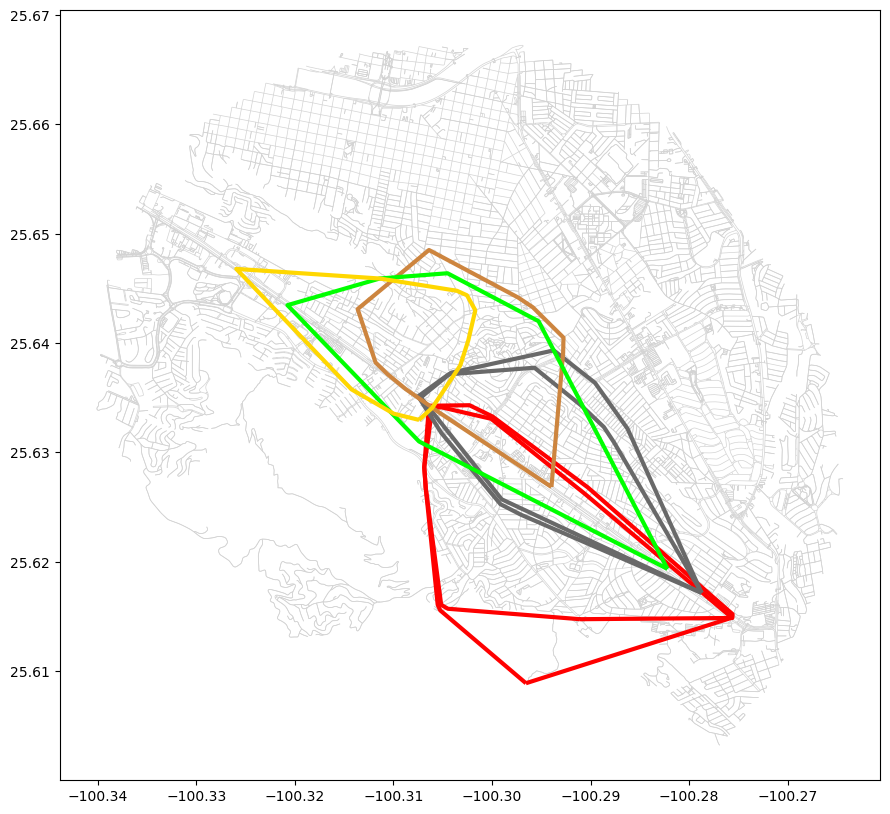

In [58]:
# Show plot
fig,ax = plt.subplots(figsize=(20,10))

c = 0
colors = ['red','dimgray','peru','lime','gold','indigo','greenyellow','tomato','firebrick','orange','magenta','forestgreen','cyan']

for mercado in isochrones_gdf.mercado.unique():
    isochrones_gdf.loc[isochrones_gdf.mercado == mercado].plot(ax=ax,zorder=1,facecolor='None',edgecolor=colors[c],linewidth=3)
    c = c+1

edges.plot(ax=ax,zorder=0,linewidth=0.5,edgecolor='lightgray')

<Axes: >

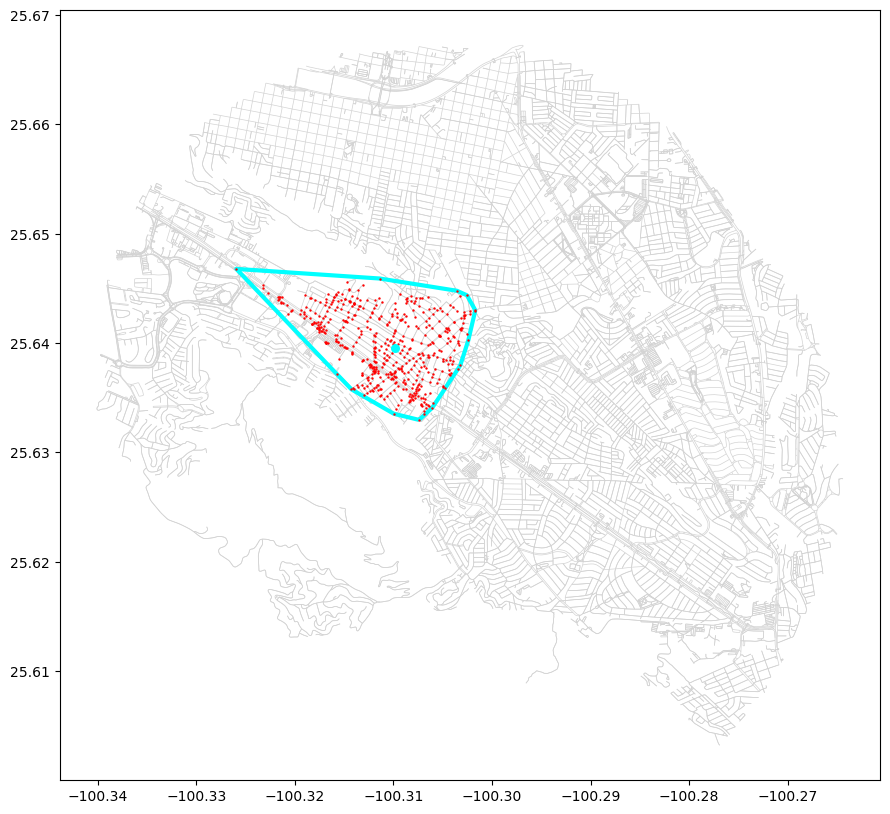

In [60]:
# Get nodes list from subGraph
sub_nodes_lst = list(sub_G.nodes())

# Find those nodes in original nodes gdf
nodes_loc = nodes.copy()
nodes_loc.reset_index(inplace=True)
nodes_loc['keep'] = 0
idx = nodes_loc.osmid.isin(sub_nodes_lst)
nodes_loc.loc[idx,'keep'] = 1
nodes_loc = nodes_loc.loc[nodes_loc.keep==1]

# Show plot
fig,ax = plt.subplots(figsize=(20,10))
mercados_gdf.loc[mercados_gdf.Name == 'Mercadito my maps comercio'].plot(ax=ax,zorder=2,color='cyan',markersize=30)
isochrones_gdf.loc[isochrones_gdf.mercado == 'Mercadito my maps comercio'].plot(ax=ax,zorder=1,facecolor='None',edgecolor='cyan',linewidth=3)
nodes_loc.plot(ax=ax,c='red',markersize=0.5)
edges.plot(ax=ax,zorder=0,linewidth=0.5,edgecolor='lightgray')